In [1]:
import yfinance as yf
import pandas as pd

In [2]:
start_date = '2021-01-01'
end_date = '2021-12-01'
idx = '^GDAXI'

Index = yf.download(idx,
interval="1d", # daily frequency
start=start_date, end=end_date) 

page = pd.read_html('https://en.wikipedia.org/wiki/DAX')
constit = page[3]['Ticker symbol']

for i in constit:
    print(i)
    prc = yf.download(i, interval='1d', start=start_date, end=end_date)
    prc = pd.DataFrame(prc['Adj Close'])
    prc.columns = [i]

    try:
        df_prc = pd.concat([df_prc, prc], axis=1)
    except:
        df_prc = prc # only executes in the first i
    
    stk = yf.Ticker(i) # get the info of a particular stock
    try:
        stk.info['floatShares']
    except:
        stk.info['floatShares'] = None
        
    try:
        stk.info['sharesOutstanding']
    except:
        stk.info['sharesOutstanding'] = None

# calculate the market value of each constituent stocks
if stk.info['floatShares']:
    mcap = prc * stk.info['floatShares']
elif stk.info['sharesOutstanding']:
    mcap = prc * stk.info['sharesOutstanding']
else:
    mcap = prc * (stk.info['marketCap']/stk.info['previousClose'])

try:
    df_mcap = pd.concat([df_mcap, mcap], axis=1)
except:
    df_mcap = mcap # only executes in the first i

[*********************100%***********************]  1 of 1 completed
ADS.DE
[*********************100%***********************]  1 of 1 completed
ALV.DE
[*********************100%***********************]  1 of 1 completed
BAS.DE
[*********************100%***********************]  1 of 1 completed
BAYN.DE
[*********************100%***********************]  1 of 1 completed
BMW.DE
[*********************100%***********************]  1 of 1 completed
CON.DE
[*********************100%***********************]  1 of 1 completed
1COV.DE
[*********************100%***********************]  1 of 1 completed
DAI.DE
[*********************100%***********************]  1 of 1 completed
DHER.DE
[*********************100%***********************]  1 of 1 completed
DBK.DE
[*********************100%***********************]  1 of 1 completed
DB1.DE
[*********************100%***********************]  1 of 1 completed
DPW.DE
[*********************100%***********************]  1 of 1 completed
DTE.DE
[********

In [3]:
page = pd.read_html('https://en.wikipedia.org/wiki/DAX')
constit = page[3]['Ticker symbol']

## 成分股每日報酬

In [4]:
part3_df = df_prc.copy()
constit_ret = part3_df.pct_change().dropna()


## DAX30 每日報酬

In [5]:
start_date = '2021-01-01'
end_date = '2021-12-01'
idx = '^GDAXI'

Index = yf.download(idx,
interval="1d", # daily frequency
start=start_date, end=end_date) 

Index.tail()
Index.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)

idx_ret = Index['Adj Close'].pct_change().dropna()
idx_ret.rename('DAX30_Return', inplace=True)
idx_ret

[*********************100%***********************]  1 of 1 completed


Date
2021-01-05   -0.005502
2021-01-06    0.017636
2021-01-07    0.005490
2021-01-08    0.005820
2021-01-11   -0.008034
                ...   
2021-11-24   -0.003678
2021-11-25    0.002493
2021-11-26   -0.041522
2021-11-29    0.001561
2021-11-30   -0.011827
Name: DAX30_Return, Length: 233, dtype: float64

In [78]:
i = 0
for row in idx_ret.index:
    new_idx = dt.datetime.strptime(str(row), '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')
    idx_ret.rename(index={row:new_idx}, inplace=True)
    

In [79]:
for i in idx_ret.index:
    print(i, type(i))

2021-01-05 <class 'str'>
2021-01-06 <class 'str'>
2021-01-07 <class 'str'>
2021-01-08 <class 'str'>
2021-01-11 <class 'str'>
2021-01-12 <class 'str'>
2021-01-13 <class 'str'>
2021-01-14 <class 'str'>
2021-01-15 <class 'str'>
2021-01-18 <class 'str'>
2021-01-19 <class 'str'>
2021-01-20 <class 'str'>
2021-01-21 <class 'str'>
2021-01-22 <class 'str'>
2021-01-25 <class 'str'>
2021-01-26 <class 'str'>
2021-01-27 <class 'str'>
2021-01-28 <class 'str'>
2021-01-29 <class 'str'>
2021-02-01 <class 'str'>
2021-02-02 <class 'str'>
2021-02-03 <class 'str'>
2021-02-04 <class 'str'>
2021-02-05 <class 'str'>
2021-02-08 <class 'str'>
2021-02-09 <class 'str'>
2021-02-10 <class 'str'>
2021-02-11 <class 'str'>
2021-02-12 <class 'str'>
2021-02-15 <class 'str'>
2021-02-16 <class 'str'>
2021-02-17 <class 'str'>
2021-02-18 <class 'str'>
2021-02-19 <class 'str'>
2021-02-22 <class 'str'>
2021-02-23 <class 'str'>
2021-02-24 <class 'str'>
2021-02-25 <class 'str'>
2021-02-26 <class 'str'>
2021-03-01 <class 'str'>


## 取得 risk-free rate (Germany 10 year bond yield)

In [41]:
rf = pd.read_csv("Germany-10Y-yield.csv")
rf.drop(columns=['Open', 'High', 'Low'], inplace=True)

In [42]:
# change percentage point string to float
i = 0
for r in rf['Close']:
    p2f = float(r.strip('%')) / 100
    rf.loc[i, 'Close'] = p2f
    i += 1

In [43]:
# reverse the dataframe
rev_rf = rf.iloc[::-1].reset_index(drop=True)

In [44]:
rev_rf

,Date,Close
0,01/04/2021,0.00605
1,01/05/2021,0.00571
2,01/06/2021,0.00552
3,01/07/2021,0.00552
4,01/08/2021,0.00518
...,...,...
231,11/24/2021,0.00225
232,11/25/2021,0.00249
233,11/26/2021,0.00334
234,11/29/2021,0.00316


In [45]:
# change date format to match with idx_ret and constit_ret
import datetime as dt
tmp = pd.DataFrame()
i = 0
for row in rev_rf['Date']:
    row_fmt = dt.datetime.strptime(row,'%m/%d/%Y').strftime('%m-%d-%Y')
    tmp.loc[i, 'Date'] = row_fmt
    i += 1  
#tmp.index += 1 # shift the index by 1 so that it corresponds to rf
type(tmp)

rev_rf.drop(columns=['Date'], inplace=True)
rf = pd.concat([rev_rf, tmp], axis=1)
rf.set_index('Date', inplace=True)

In [52]:
# find out why rf has more data than constit_ret and idx_ret
# constit_ret.index = constit_ret.index.date

constit_l = []
rf_l = []

for i in constit_ret.index:
    i = dt.datetime.strptime(i, '%Y-%m-%d').strftime('%m-%d-%Y')
    constit_l.append(i)
for j in rf.index:
    rf_l.append(j)

# 十年期公債的開市日比 DAX30 多兩天
len(rf_l) - len(constit_l) 
list(set(constit_l) - set(rf_l)) + list(set(rf_l) - set(constit_l))

['04-04-2021', '01-04-2021', '05-24-2021']

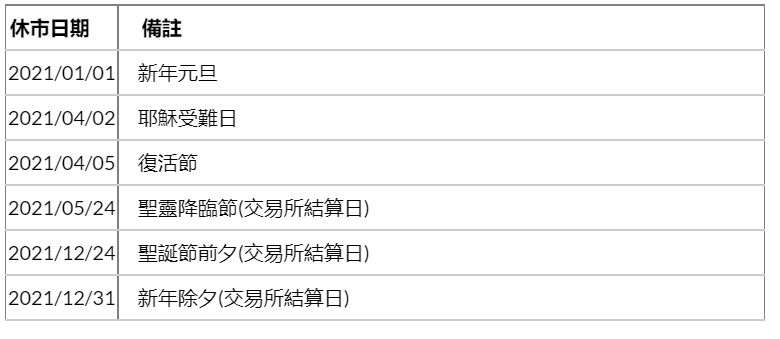

In [56]:
# delete '05-24-2021' and '01-04-2021'
update_rf = rf.drop(['05-24-2021', '04-04-2021'])

In [57]:
update_rf.head(3)

,Close
Date,
01-04-2021,0.00605
01-05-2021,0.00571
01-06-2021,0.00552


In [59]:
# find out why rf has more data than constit_ret and idx_ret
# constit_ret.index = constit_ret.index.date

constit_l = []
rf_l = []

for i in constit_ret.index:
    i = dt.datetime.strptime(i, '%Y-%m-%d').strftime('%m-%d-%Y')
    constit_l.append(i)
for j in update_rf.index:
    rf_l.append(j)

# 十年期公債的開市日比 DAX30 多兩天
len(rf_l) - len(constit_l) 
list(set(constit_l) - set(rf_l)) + list(set(rf_l) - set(constit_l))

['01-04-2021']

In [60]:
update_rf

,Close
Date,
01-04-2021,0.00605
01-05-2021,0.00571
01-06-2021,0.00552
01-07-2021,0.00552
01-08-2021,0.00518
...,...
11-24-2021,0.00225
11-25-2021,0.00249
11-26-2021,0.00334


In [61]:
from datetime import datetime
for row in update_rf.index:
    new_idx = dt.datetime.strptime(row, '%m-%d-%Y').strftime('%Y-%m-%d')
    update_rf.rename(index={row:new_idx}, inplace=True)
update_rf.head()

,Close
Date,
2021-01-04,0.00605
2021-01-05,0.00571
2021-01-06,0.00552
2021-01-07,0.00552
2021-01-08,0.00518


In [62]:
# pct_change()
update_rf['Close'] = update_rf['Close'].pct_change()
update_rf.dropna(inplace=True)
update_rf.rename(columns={'Close':'DE_10Y_Return'}, inplace=True)

In [63]:
print(update_rf.shape)
print(constit_ret.shape)
print(idx_ret.shape)

(233, 1)
(233, 30)
(233,)


In [67]:
# constit_ret.index = constit_ret.index.strptime('%Y-%m-%d')

In [90]:
all = constit_ret.join(update_rf)

In [91]:
all = all.join(idx_ret)

---

In [92]:
all

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,ENR.DE,VOW3.DE,VNA.DE,DE_10Y_Return,DAX30_Return
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,-0.019634,-0.010271,-0.007551,0.003753,-0.013916,-0.008058,-0.008124,-0.000176,0.055291,0.006711,...,0.000946,-0.003360,-0.020862,-0.002659,-0.002041,-0.001328,-0.008351,0.004717,-0.056198,-0.005502
2021-01-06,0.007251,0.051989,0.046118,0.039515,0.001835,-0.010688,0.027691,-0.008086,-0.039903,0.059887,...,-0.022201,0.036662,0.038636,0.004189,0.038337,0.021934,0.001494,-0.040241,-0.033275,0.017636
2021-01-07,-0.010970,-0.008220,0.015437,0.017305,0.000423,0.014693,0.028463,0.024101,-0.028551,0.021642,...,0.003865,-0.014634,0.008206,-0.009101,0.019856,0.036098,0.005018,-0.006289,0.000000,0.005490
2021-01-08,0.022877,0.003169,0.002485,-0.015673,-0.007463,0.014480,-0.000369,-0.001730,0.008557,-0.006679,...,0.011068,0.000825,0.048562,0.015882,-0.002414,0.049278,-0.011741,0.013010,-0.061594,0.005820
2021-01-11,-0.010844,-0.011908,-0.015019,-0.009903,-0.016882,-0.023510,-0.008121,-0.009360,-0.023608,0.000420,...,-0.023322,-0.008656,-0.010867,-0.001319,-0.000161,-0.003889,-0.010651,-0.002083,-0.046332,-0.008034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,-0.012691,-0.000738,-0.016839,-0.024956,-0.020648,-0.019292,-0.024735,-0.018547,-0.005882,0.024150,...,0.020725,0.016436,0.007077,-0.005019,-0.009130,0.002952,-0.027750,0.050135,0.027397,-0.003678
2021-11-25,-0.001677,-0.002216,-0.004524,-0.000948,-0.014704,-0.007830,-0.005073,0.000113,-0.038884,0.010480,...,0.004809,-0.001578,0.068133,0.007399,0.010794,0.030698,-0.000116,0.006551,0.106667,0.002493
2021-11-26,-0.054488,-0.055317,-0.060055,-0.039747,-0.061670,-0.062945,-0.067371,-0.059063,0.028584,-0.075194,...,-0.113268,-0.067351,-0.024313,-0.038391,-0.054304,-0.013464,-0.048851,-0.048430,0.341365,-0.041522


## Linear Regression

### Check for one stock first

In [130]:
import statsmodels.formula.api as smf
Y = all['BAYN.DE'] - all['DE_10Y_Return'] # 被解釋變數
X = all['DAX30_Return'] - all['DE_10Y_Return']# 解釋變數

reg_df = pd.DataFrame([Y, X], index=['R', 'MKT']).T

In [131]:
reg_df = pd.DataFrame([Y, X], index=['R', 'MKT'])
reg_df
reg_df = reg_df.T # Y, X 結合會以上下交疊方式，即 columns 為時間，因此轉置讓時間變成 rows
reg_df

,R,MKT
Date,,
2021-01-05,0.059952,0.050697
2021-01-06,0.072790,0.050911
2021-01-07,0.017305,0.005490
2021-01-08,0.045921,0.067414
2021-01-11,0.036429,0.038298
...,...,...
2021-11-24,-0.052354,-0.031075
2021-11-25,-0.107615,-0.104173
2021-11-26,-0.381112,-0.382887


In [132]:
TSR = smf.ols('R ~ 1 + MKT', data=reg_df).fit() # TSR = time series regression
YHat = TSR.fittedvalues
print(TSR.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.125e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.36e-229
Time:                        08:41:47   Log-Likelihood:                 667.22
No. Observations:                 233   AIC:                            -1330.
Df Residuals:                     231   BIC:                            -1324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0006      0.001     -0.629      0.5

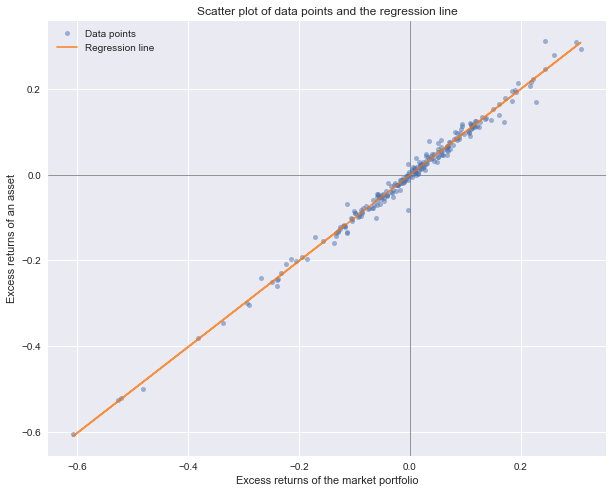

In [133]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)

# 在 y = 0 的位置加一條 水平線 (horizontal line)
plt.axhline(0, color='xkcd:gray', linestyle='-', label='_nolegend_', linewidth=1)
# 在 x = 0 的位置加一條 垂直線 (vertical line)
plt.axvline(0, color='xkcd:gray', linestyle='-', label='_nolegend_', linewidth=1)

plt.plot(X,Y,'o', alpha=0.5, markersize=5)
plt.plot(X,YHat, color='xkcd:orange', alpha=0.75)

plt.ylabel('Excess returns of an asset')
plt.xlabel('Excess returns of the market portfolio')
plt.title('Scatter plot of data points and the regression line')
plt.legend(['Data points', 'Regression line'], loc='best')
plt.show()